In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Carga de dataset

In [24]:
movies = pd.read_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI ML Ops\pi_mlops_felipeviera\venv\Datasets\movies_dataset.csv')

## EDA (inicial)

belongs_to_collection, genres, production_companies, production_countries, spoken_languages

In [25]:
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### Columnas "budget" y "revenue"

In [27]:
print(movies['revenue'].describe())

count    4.546000e+04
mean     1.120935e+07
std      6.433225e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64


Columna bugdet no es tipo float y debe ser transformada.

In [28]:
print(movies['budget'].describe())

count     45466
unique     1226
top           0
freq      36573
Name: budget, dtype: object


Columna 'title' tiene títulos repetidos ya que puede haber varias peliculas distintas con el mismo título

In [29]:
movies['title'][movies['title'].duplicated(keep=False)].value_counts()

title
Cinderella               11
Hamlet                    9
Alice in Wonderland       9
Beauty and the Beast      8
Les Misérables            8
                         ..
The Kingdom               2
Strayed                   2
Mickey                    2
Envy                      2
A Long and Happy Life     2
Name: count, Length: 2330, dtype: int64

## Transformaciones y EDA

### Columnas con datos anidados

* Nota: Las columnas con datos anidados belongs_to_collection, genres, production_companies, production_countries, spoken_languages servirán más adelante en el modelo, por lo que conviene desanidarlas

Se crea función para desanidar columnas

In [30]:
import ast

def desanidar_name_lista(lista_anidado):
    if not isinstance(lista_anidado, str): # Chequea si lista_anidado no es un string
        return []
    try: # Se inicia un bloque try en caso de encontrar strings con valores distintos al planeado
        dict_anidado = ast.literal_eval(lista_anidado) # Convierte texto a lista de diccionarios
        return [dicc['name'] for dicc in dict_anidado if 'name' in dicc] # Busca en la lista de diccionarios y extrae el campo 'name'
    except (ValueError, SyntaxError, TypeError): # Se encarga de posibles errores
        return []

#### Columna belongs_to_collection

In [31]:
movies['belongs_to_collection'].head()

0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2    {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                  NaN
4    {'id': 96871, 'name': 'Father of the Bride Col...
Name: belongs_to_collection, dtype: object

In [32]:
movies['belongs_to_collection'].iloc[0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [33]:
movies[movies['belongs_to_collection'].isna()].head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


Se elimina columna belongs_to_collection ya que solo contiene títulos. La columna title suplirá esta función

In [34]:
movies = movies.drop(columns=['belongs_to_collection'])

Columna genres es una lista de diccionarios

In [35]:
movies['genres'].head(10)

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
5    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
6    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
7    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
8    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
9    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...
Name: genres, dtype: object

In [36]:
movies['genres'].iloc[5]

"[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]"

In [37]:
movies['genre_list'] = movies['genres'].apply(desanidar_name_lista)

movies['genre_list'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genre_list, dtype: object

#### Columna genre_list: Desanidar y one hot encoding

In [38]:
# Aqui se convierte cada genre de la lista en su propia fila con .explode()
# Se crea una columna binaria por cada genero con .str.get_dummies()
# se combinan las variables dummies de vuelta al dataframe original mediante la sumatoria de las filas que pertenezcan a la misma pelicula en .groupby(level=0).sum()
genre_dummies = movies['genre_list'].explode().str.get_dummies().groupby(level=0).sum()

movies = pd.concat([movies, genre_dummies], axis=1)

print(movies.columns)

Index(['adult', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count', 'genre_list',
       'Action', 'Adventure', 'Animation', 'Aniplex', 'BROSTA TV',
       'Carousel Productions', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western'],
      dtype='object')


Eliminar columnas: 'Aniplex', 'BROSTA TV', 'Carousel Productions', 'GoHands', 'Mardock Scramble Production Committee', 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Sentai Filmworks', 'Telescene Film Group Productions', 'The Cartel', 'Vision View Entertainment', 'genres', 'genre_list'

In [39]:
movies = movies.drop(columns=['Aniplex', 
                              'BROSTA TV', 
                              'Carousel Productions', 
                              'GoHands', 
                              'Mardock Scramble Production Committee', 
                              'Odyssey Media', 'Pulser Productions', 
                              'Rogue State', 
                              'Sentai Filmworks', 
                              'Telescene Film Group Productions', 
                              'The Cartel', 
                              'Vision View Entertainment', 
                              'genres', 
                              'genre_list'])

movies.columns

Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

#### Columna spoken_languages: Desanidar y One hot encoding

Nota: Columna original_language y spoken_languages tienen demasiados idiomas ¿Valdrá la pena hacer one hot enconding?

In [40]:
movies['original_language'].value_counts().sum()

45455

In [41]:
movies['spoken_languages'].iloc[5]

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]"

In [42]:
movies['language_list'] = movies['spoken_languages'].apply(desanidar_name_lista)

movies['language_list'].value_counts()

language_list
[English]                                  22395
[]                                          3835
[Français]                                  1853
[日本語]                                       1289
[Italiano]                                  1218
                                           ...  
[Français, Latin, , Português, English]        1
[Español, עִבְרִית, English]                   1
[English, Íslenska, Pусский]                   1
[فارسی, ]                                      1
[Fulfulde, English]                            1
Name: count, Length: 1843, dtype: int64

Obtenemos una lista de los idiomas resultantes

In [43]:
# Se inicializa un set() vacío para almacenar los lenguajes sin repeticiones
unique_languages = set()

# itera sobre la columna 'language_list'
# Iterate over the language_list column
for languages in movies['language_list']:
    if isinstance(languages, list):  # Se asegura de que el valor sea una lista
        unique_languages.update(lang for lang in languages if lang.strip())  # Excluye listas vacías

# Convierte el set a la lista ordenada 
unique_languages_list = sorted(unique_languages)

print(unique_languages_list)

['?????', '??????', 'Afrikaans', 'Azərbaycan', 'Bahasa indonesia', 'Bahasa melayu', 'Bamanankan', 'Bokmål', 'Bosanski', 'Català', 'Cymraeg', 'Dansk', 'Deutsch', 'Eesti', 'English', 'Español', 'Esperanto', 'Français', 'Fulfulde', 'Gaeilge', 'Galego', 'Hausa', 'Hrvatski', 'Italiano', 'Kinyarwanda', 'Kiswahili', 'Latin', 'Latviešu', 'Lietuvi\x9akai', 'Magyar', 'Malti', 'Nederlands', 'No Language', 'Norsk', 'Polski', 'Português', 'Pусский', 'Română', 'Slovenčina', 'Slovenščina', 'Somali', 'Srpski', 'Tiếng Việt', 'Türkçe', 'Wolof', 'euskera', 'isiZulu', 'ozbek', 'shqip', 'suomi', 'svenska', 'Íslenska', 'Český', 'ελληνικά', 'Український', 'беларуская мова', 'български език', 'қазақ', 'עִבְרִית', 'اردو', 'العربية', 'فارسی', 'پښتو', 'हिन्दी', 'বাংলা', 'ਪੰਜਾਬੀ', 'தமிழ்', 'తెలుగు', 'ภาษาไทย', 'ქართული', '广州话 / 廣州話', '日本語', '普通话', '한국어/조선말']


Debido a la gran cantidad de idiomas, estos deberán se agrupados para luego poder realizar el one hot encoding

Se usará un diccionario para mapear los grupos a los cuáles pertenece cada lenguaje

In [44]:
language_to_group = {
    
    'Français': 'Romance Languages',
    'Español': 'Romance Languages',
    'Italiano': 'Romance Languages',
    'Português': 'Romance Languages',
    'Català': 'Romance Languages',
    'Latin': 'Romance Languages',
    'Română': 'Romance Languages',

    'English': 'Germanic Languages',
    'Deutsch': 'Germanic Languages',
    'Nederlands': 'Germanic Languages',
    'Bokmål': 'Germanic Languages',
    'Svenska': 'Germanic Languages',
    'Dansk': 'Germanic Languages',

    'Pусский': 'Slavic Languages',
    'Polski': 'Slavic Languages',
    'Український': 'Slavic Languages',
    'Српски': 'Slavic Languages',
    'Slovenčina': 'Slavic Languages',

    '日本語': 'Asian Languages',
    '普通话': 'Asian Languages',
    '한국어/조선말': 'Asian Languages',
    'हिन्दी': 'Asian Languages',
    'বাংলা': 'Asian Languages',
    'اردو': 'Asian Languages',

    'Kiswahili': 'African Languages',
    'Hausa': 'African Languages',
    'Fulfulde': 'African Languages',
    'Somali': 'African Languages',
    'isiZulu': 'African Languages',

    'No Language': 'Other Languages',
    '?????': 'Other Languages',
    '??????': 'Other Languages',
}


Se define función que mapeará los idiomas a sus respectivos grupos

In [45]:
def map_languages_to_groups(language_list):
    if not language_list:  # Se encarga de las listas vacías
        return []
    return list({language_to_group.get(language, 'Other Languages') for language in language_list})

Se mapea los lenguajes y se realiza el one hot encoding

In [46]:
# Mapea los lenguajes a sus respectivos grupos
movies['language_groups'] = movies['language_list'].apply(map_languages_to_groups)

# Realiza el one hot encoding a los lenguajes agrupados
language_group_dummies = movies['language_groups'].explode().str.get_dummies().groupby(level=0).sum()

# Concatena las columnas resultantes del one hot encoding de vuelta al dataframe
movies = pd.concat([movies, language_group_dummies], axis=1)

print(movies.columns)

Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'language_list', 'language_groups', 'African Languages',
       'Asian Languages', 'Germanic Languages', 'Other Languages',
       'Romance Languages', 'Slavic Languages'],
      dtype='object')


Se elimina columnas language_list, original_language, language_groups

In [47]:
# eliminar columnas language_list, original_language, language_groups
movies = movies.drop(columns=['language_list', 'original_language', 'language_groups', 'spoken_languages'])

#### Columna production_companies: (Se elimina) Desanidar y One hot encoding

In [48]:
movies['production_companies'].iloc[2]

"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]"

Nota: columna production_companies tiene valores booleanos en 'name' en algunas filas

Nota: Desanidar la columna 'production_companies' tarda demasiado y no resulta

Se elimina columna production companies ya que no se considera relevante para posteriores procesos

In [49]:
movies = movies.drop(columns=['production_companies'])

#### Columna production_countries: Desanidar y One hot encoding

Nueva Nota: oredenar el codigo siguiente

In [50]:
# Se aplica la función desanidar_name_lista a la columna 'production_countries' del DataFrame
movies['prod_countries'] = movies['production_countries'].apply(desanidar_name_lista)

In [51]:
# Diccionario que mapea países a sus respectivos continentes
country_to_continent = {
    'Africa': [
        'Algeria', 'Angola', 'Botswana', 'Burkina Faso', 'Cameroon', 'Chad', 'Congo',
        'Cote D\'Ivoire', 'Egypt', 'Ethiopia', 'Ghana', 'Kenya', 'Liberia',
        'Libyan Arab Jamahiriya', 'Madagascar', 'Mali', 'Mauritania', 'Morocco',
        'Namibia', 'Nigeria', 'Rwanda', 'Senegal', 'Somalia', 'South Africa',
        'Tanzania', 'Tunisia', 'Uganda', 'Zimbabwe'
    ],
    'Antarctica': [
        'Antarctica'
    ],
    'Asia': [
        'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan', 'Brunei Darussalam',
        'Cambodia', 'China', 'Cyprus', 'Georgia', 'Hong Kong', 'India', 'Indonesia',
        'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait',
        'Kyrgyz Republic', 'Lao People\'s Democratic Republic', 'Lebanon',
        'Macao', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea',
        'Pakistan', 'Palestinian Territory', 'Philippines', 'Qatar', 'Saudi Arabia',
        'Singapore', 'South Korea', 'Sri Lanka', 'Syrian Arab Republic', 'Taiwan',
        'Tajikistan', 'Thailand', 'Turkey', 'United Arab Emirates', 'Uzbekistan', 'Vietnam'
    ],
    'Europe': [
        'Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
        'Croatia', 'Czech Republic', 'Czechoslovakia', 'Denmark', 'East Germany',
        'Estonia', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Hungary',
        'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania',
        'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro',
        'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia',
        'Serbia', 'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'Soviet Union',
        'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Yugoslavia'
    ],
    'North America': [
        'Bahamas', 'Barbados', 'Bermuda', 'Canada', 'Cayman Islands', 'Costa Rica',
        'Cuba', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Honduras',
        'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Trinidad and Tobago',
        'United States Minor Outlying Islands', 'United States of America'
    ],
    'Oceania': [
        'Australia', 'French Polynesia', 'New Zealand', 'Papua New Guinea', 'Samoa'
    ],
    'South America': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay',
        'Peru', 'Uruguay', 'Venezuela'
    ],
    'Other Continent': [
        'Aruba', 'Martinique', 'French Southern Territories'
    ]
}


In [52]:
# Función para mapear una lista de países a sus respectivos continentes
def map_to_continent(country_list):
    # Si la lista de países está vacía o es None, devolvemos una lista vacía
    if not country_list:  
        return []
    continents = []     # Lista para almacenar los continentes encontrados
    for country in country_list:    # Iteramos sobre cada país en la lista
        found = False   # Bandera para verificar si el país fue asignado a un continente
        for continent, countries in country_to_continent.items():
            if country in countries:    # Si el país está en la lista de un continente
                continents.append(continent)
                found = True    # Marcamos como encontrado
                break   # Salimos del loop interno
        if not found:  # Si el país no está en ningún continente lo asignamos a "Other Continent"
            continents.append('Other Continent')
    return list(set(continents))  # Eliminamos duplicados y devolvemos los continentes únicos


In [53]:
movies['prod_continents'] = movies['prod_countries'].apply(map_to_continent)

# Realiza el one hot encoding a los lenguajes agrupados
continent_group_dummies = movies['prod_continents'].explode().str.get_dummies().groupby(level=0).sum()

# Concatena las columnas resultantes del one hot encoding de vuelta al dataframe
movies = pd.concat([movies, continent_group_dummies], axis=1)

print(movies.columns)

Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_countries',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'African Languages', 'Asian Languages', 'Germanic Languages',
       'Other Languages', 'Romance Languages', 'Slavic Languages',
       'prod_countries', 'prod_continents', 'Africa', 'Antarctica', 'Asia',
       'Europe', 'North America', 'Oceania', 'Other Continent',
       'South America'],
      dtype='object')


In [54]:
# eliminar columnas 'prod_countries', 'prod_continents', 'production_countries'
movies = movies.drop(columns=['prod_countries', 'prod_continents', 'production_countries'])

#### Columna status one hot encoding

Se realiza mapeo de las categorías de la columna status, con el fin de generar menos columnas al momento de realizar one hot encoding

In [55]:
movies['status'].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

In [56]:
# Se define el mapeo
mapeo_status = {
    'Released': 'Released',
    'Rumored': 'In Progress',
    'Post Production': 'In Progress',
    'In Production': 'In Progress',
    'Planned': 'In Progress',
    'Canceled': 'Canceled'
}

# Se mapea la columna status a las nuevas categorias
movies['status'] = movies['status'].map(mapeo_status)

# One hot encoding de la columna status
status_dummies = pd.get_dummies(movies['status']).astype(int)

# Se concatenan las columnas derivadas del one hot encoding
movies = pd.concat([movies, status_dummies], axis=1)

In [57]:
# Se elimina columna status
movies = movies.drop(columns=['status'])

### Columnas "budget" y "revenue", transformar valores nulos a 0

In [58]:
print("revenue valores nulos:", movies['revenue'].isna().sum(),
'\n'"budget valores nulos:", movies['budget'].isna().sum())

revenue valores nulos: 6 
budget valores nulos: 0


In [59]:
movies['budget'] = movies['budget'].fillna(0)
movies['revenue'] = movies['revenue'].fillna(0)

print("revenue valores nulos:", movies['revenue'].isna().sum(),
'\n'"budget valores nulos:", movies['budget'].isna().sum())

revenue valores nulos: 0 
budget valores nulos: 0


### Manejar valores no numéricos de columna budget

In [60]:
no_numericos = movies[movies['budget'].str.isnumeric() == False]

no_numericos

,adult,budget,homepage,id,imdb_id,original_title,overview,popularity,poster_path,release_date,...,Antarctica,Asia,Europe,North America,Oceania,Other Continent,South America,Canceled,In Progress,Released
19730,- Written by Ørnås,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,1,...,0,0,0,0,0,0,0,0,0,0
29503,Rune Balot goes to a casino connected to the ...,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,12,...,0,0,0,0,0,0,0,0,0,0
35587,Avalanche Sharks tells the story of a bikini ...,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,22,...,0,0,0,0,0,0,0,0,0,0


In [61]:
movies = movies.drop(no_numericos.index)

### Cambiar data type de columna budget

In [62]:
movies['budget'] = movies['budget'].astype(float)

### EDA columnas budget y revenue

NOTA: Revisar outliers

In [63]:
movies[['budget', 'revenue']].describe()

,budget,revenue
count,4.546300e+04,4.546300e+04
mean,4.224579e+06,1.120861e+07
std,1.742413e+07,6.433019e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,3.800000e+08,2.787965e+09


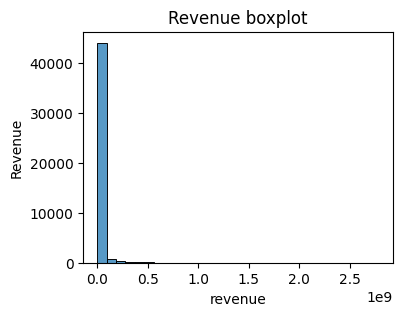

In [64]:
plt.figure(figsize=(4,3))
sns.histplot(movies['revenue'], bins=30)
plt.title('Revenue boxplot')
plt.ylabel('Revenue')
plt.show()

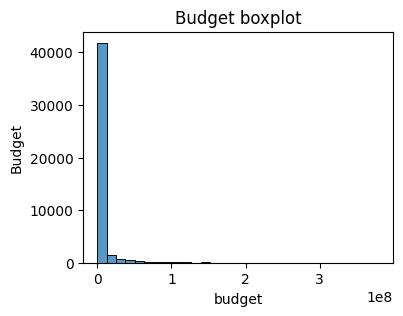

In [65]:
plt.figure(figsize=(4,3))
sns.histplot(movies['budget'], bins=30)
plt.title('Budget boxplot')
plt.ylabel('Budget')
plt.show()

### Columna popularity a tipo float

In [66]:
movies['popularity'] = movies['popularity'].astype('float')

In [67]:
movies['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

### Eliminar valores nulos columna release_date

In [68]:
print('release_date valores nulos:', movies['release_date'].isna().sum())

release_date valores nulos: 87


In [69]:
movies.dropna(subset=['release_date'], inplace=True)

print('release_date valores nulos:', movies['release_date'].isna().sum())

release_date valores nulos: 0


### Eliminar valores duplicados

In [70]:
id_duplicados_count = movies['id'].duplicated().sum()
print("id's duplicados:", id_duplicados_count)

id's duplicados: 30


In [71]:
movies = movies.drop_duplicates(subset=['id'], keep='first')

id_duplicados_count = movies['id'].duplicated().sum()
print("id's duplicados:", id_duplicados_count)

id's duplicados: 0


### Formato fechas y columnas "release_day", "release_month", "release_year"

In [72]:
# Se convierte la columna 'release_date' a tipo datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], format="%Y-%m-%d") 

In [73]:
# Se crea la columna "release_day"
movies['release_day'] = movies['release_date'].dt.strftime('%A')

In [74]:
# Se mapea días en español

dias_dicc = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

movies['release_day'] = movies['release_day'].map(dias_dicc)

In [75]:
# Se crea la columna "release_month"

movies['release_month'] = movies['release_date'].dt.strftime('%B')

In [76]:
# Se mapea meses en español

meses_dicc = {
    'January' : 'Enero',
    'February' : 'Febrero',
    'March' : 'Marzo',
    'April' : 'Abril',
    'May' : 'Mayo',
    'June' : 'Junio',
    'July' : 'Julio',
    'August' : 'Agosto',
    'September' : 'Septiembre',
    'October' : 'Octubre',
    'November' : 'Noviembre',
    'December' : 'Diciembre'
}

movies['release_month'] = movies['release_month'].map(meses_dicc)

In [77]:
# Se crea la columna "release_year"

movies['release_year'] = movies['release_date'].dt.year

movies[['release_day', 'release_month', 'release_year']].head()

,release_day,release_month,release_year
0,Lunes,Octubre,1995
1,Viernes,Diciembre,1995
2,Viernes,Diciembre,1995
3,Viernes,Diciembre,1995
4,Viernes,Febrero,1995


### Creación columna return

In [78]:
# Se crea columna 'return' la cual es la división de las columnas 'revenue' y 'return'
# Si alguna de las columnas es 0, 'return' es igual a 0
movies['return'] = np.where(
    (movies['revenue'] == 0) | (movies['budget'] == 0),
    0,
    movies['revenue'] / movies['budget']
    )

print(movies[['revenue', 'budget', 'return']])

           revenue      budget     return
0      373554033.0  30000000.0  12.451801
1      262797249.0  65000000.0   4.043035
2              0.0         0.0   0.000000
3       81452156.0  16000000.0   5.090760
4       76578911.0         0.0   0.000000
...            ...         ...        ...
45460          0.0         0.0   0.000000
45462          0.0         0.0   0.000000
45463          0.0         0.0   0.000000
45464          0.0         0.0   0.000000
45465          0.0         0.0   0.000000

[45346 rows x 3 columns]


### Eliminar las columnas: video, imdb_id, adult, original_title, poster_path y homepage

Se elimina ademas las columnas 'overview' y 'tagline' por considerarse poco relevantes

In [79]:
movies = movies.drop(columns=['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage', 'overview', 'tagline'])

Se Ordenan las columnas

In [80]:
movies.columns

Index(['budget', 'id', 'popularity', 'release_date', 'revenue', 'runtime',
       'title', 'vote_average', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'African Languages', 'Asian Languages', 'Germanic Languages',
       'Other Languages', 'Romance Languages', 'Slavic Languages', 'Africa',
       'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania',
       'Other Continent', 'South America', 'Canceled', 'In Progress',
       'Released', 'release_day', 'release_month', 'release_year', 'return'],
      dtype='object')

In [81]:
orden_columnas = ['id', 'title', 'release_date', 'release_day', 'release_month', 'release_year', 'runtime',
       'popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'return', 
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'African Languages', 'Asian Languages', 'Germanic Languages',
       'Other Languages', 'Romance Languages', 'Slavic Languages', 'Africa',
       'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania',
       'Other Continent', 'South America',
       'Released', 'In Progress', 'Canceled']

In [82]:
movies[orden_columnas].head(1)

,id,title,release_date,release_day,release_month,release_year,runtime,popularity,vote_average,vote_count,...,Antarctica,Asia,Europe,North America,Oceania,Other Continent,South America,Released,In Progress,Canceled
0,862,Toy Story,1995-10-30,Lunes,Octubre,1995,81.0,21.946943,7.7,5415.0,...,0,0,0,1,0,0,0,1,0,0


### Columna title: Se Aplica .title() 

In [83]:
movies['title'] = movies['title'].str.title()

### Columna id: se convierte a tipo int

In [84]:
movies['id'] = movies['id'].astype(int)

Nota:
considerar hacer los siguientes datasets para las funciones:
* date: 'movie_id', 'release_year', 'release_month', 'release_day'
* movies_details: 'movie_id', 'title', 'budget', 'revenue', 'return'
* score: 'movie_id', 'popularity', 'vote_count', 'vote_average'
* Mantener dataset movie con las columnas de ML y 'id', 'title', 'release_year', 'runtime'. (eliminar: 'Canceled', 'In Progress', 'Released')

### Se dividen los datasets en unos más pequeños para que el funcionamiento de las funciones sea más eficiente

In [85]:
movies_ml = movies

In [86]:
movies_ml.to_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI ML Ops\pi_mlops_felipeviera\datasets\movies_ml.csv', index=False)

In [87]:
movies_ml.head(2)

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,Action,...,Oceania,Other Continent,South America,Canceled,In Progress,Released,release_day,release_month,release_year,return
0,30000000.0,862,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,0,...,0,0,0,0,0,1,Lunes,Octubre,1995,12.451801
1,65000000.0,8844,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,0,...,0,0,0,0,0,1,Viernes,Diciembre,1995,4.043035


In [88]:
movies_ml.columns

Index(['budget', 'id', 'popularity', 'release_date', 'revenue', 'runtime',
       'title', 'vote_average', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'African Languages', 'Asian Languages', 'Germanic Languages',
       'Other Languages', 'Romance Languages', 'Slavic Languages', 'Africa',
       'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania',
       'Other Continent', 'South America', 'Canceled', 'In Progress',
       'Released', 'release_day', 'release_month', 'release_year', 'return'],
      dtype='object')

In [89]:
# Exportar a csv nuevos dataset, que serán usados por las funciones

date_df = movies_ml[['id', 'release_year', 'release_month', 'release_day']]

date_df.rename(columns={'id': 'movie_id'}, inplace=True)

date_df.head()

,movie_id,release_year,release_month,release_day
0,862,1995,Octubre,Lunes
1,8844,1995,Diciembre,Viernes
2,15602,1995,Diciembre,Viernes
3,31357,1995,Diciembre,Viernes
4,11862,1995,Febrero,Viernes


In [90]:
date_df.to_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI ML Ops\pi_mlops_felipeviera\datasets\movies_date.csv', index=False)

In [91]:
movies_details = movies_ml[['id', 'title', 'budget', 'revenue', 'return']]

movies_details.rename(columns={'id': 'movie_id'}, inplace=True)

movies_details.head()

,movie_id,title,budget,revenue,return
0,862,Toy Story,30000000.0,373554033.0,12.451801
1,8844,Jumanji,65000000.0,262797249.0,4.043035
2,15602,Grumpier Old Men,0.0,0.0,0.000000
3,31357,Waiting To Exhale,16000000.0,81452156.0,5.090760
4,11862,Father Of The Bride Part Ii,0.0,76578911.0,0.000000


In [92]:
movies_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie_id  45346 non-null  int32  
 1   title     45346 non-null  object 
 2   budget    45346 non-null  float64
 3   revenue   45346 non-null  float64
 4   return    45346 non-null  float64
dtypes: float64(3), int32(1), object(1)
memory usage: 1.9+ MB


In [93]:
movies_details.to_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI ML Ops\pi_mlops_felipeviera\datasets\movies_details.csv', index=False)

In [94]:
score_df = movies_ml[['id', 'popularity', 'vote_count', 'vote_average']]

score_df.rename(columns={'id':'movie_id'}, inplace=True)

score_df.head()

,movie_id,popularity,vote_count,vote_average
0,862,21.946943,5415.0,7.7
1,8844,17.015539,2413.0,6.9
2,15602,11.712900,92.0,6.5
3,31357,3.859495,34.0,6.1
4,11862,8.387519,173.0,5.7


In [95]:
score_df.to_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI ML Ops\pi_mlops_felipeviera\datasets\movies_score.csv', index=False)

Nota: Revisar que columnas se usarán para modelo Machine Learning, eliminar el resto

## Nube de Palabras de los títulos de películas

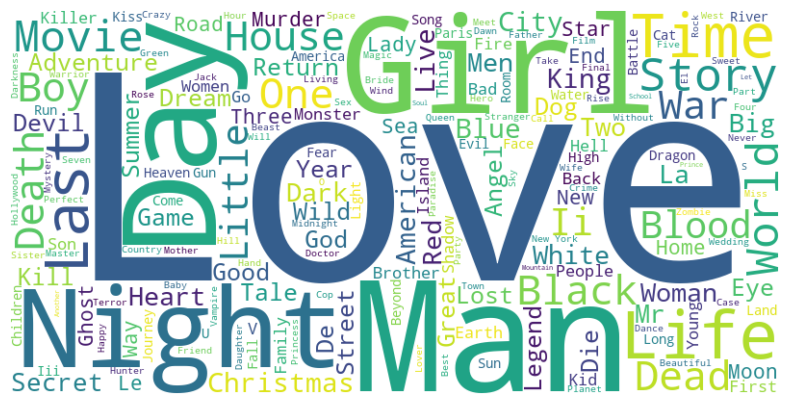

In [96]:
from wordcloud import WordCloud

# Se combina todos los títulos en un solo texto
texto_titulos = " ".join(movies_details['title'])

# Se crea la nube de palabras
wordCloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(texto_titulos)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()